In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use("seaborn")
np.random.seed(42)

In [11]:
cities = []
for i in range(25):
  cities.append(i)

adjacency_mat = np.load('bayg29.npy')

In [12]:
type(adjacency_mat[0])

numpy.ndarray

In [13]:
class Population():
    def __init__(self, bag, adjacency_mat):
        self.bag = bag
        self.parents = []
        self.score = 0
        self.best = None
        self.adjacency_mat = adjacency_mat

In [14]:
def init_population(cities, adjacency_mat, n_population):
    return Population(
        np.asarray([np.random.permutation(cities) for _ in range(n_population)]), 
        adjacency_mat
    )

In [15]:
pop = init_population(cities, adjacency_mat, 25)
pop.bag

array([[ 8, 16,  0, 23, 11,  9, 13,  1, 22,  5,  2, 12, 15,  3,  4, 20,
        17, 21, 18, 24,  7, 10, 14, 19,  6],
       [13, 10,  5,  7, 17,  1, 20,  0, 23, 19, 12,  4,  2,  8,  3,  6,
        22, 18, 14, 15,  9, 16, 24, 21, 11],
       [15, 16,  4,  9, 24, 21, 10,  5, 18, 12, 17, 22,  3,  0, 13,  2,
        23,  7, 11,  6, 14, 19,  1, 20,  8],
       [24,  2,  5, 12, 20,  0, 21, 18, 10, 22,  4, 16,  8, 23,  6, 19,
         7, 14, 15, 13,  3,  9,  1, 11, 17],
       [18,  9, 13,  5, 20,  3, 16,  1, 21,  4, 24, 23, 15, 17, 19,  2,
        10,  7, 11, 22,  8,  6,  0, 12, 14],
       [10,  1,  3, 18, 19, 12,  5,  8,  6,  9, 14, 16, 24, 13, 21, 17,
         0, 20,  7, 11,  2,  4, 23, 22, 15],
       [ 7, 24,  0,  8, 17, 13,  1, 11,  5,  2, 20, 22, 15, 10, 14, 23,
        21,  4,  3, 19, 16,  6, 18, 12,  9],
       [16, 22, 13,  9,  3,  1, 14, 17,  4, 15, 20,  7, 24, 21,  2,  8,
        12, 18,  0,  6, 10, 19, 23, 11,  5],
       [18, 15,  9, 17, 13,  5,  3, 22, 24, 10, 12,  7, 14,  4, 

In [16]:
def fitness(self, chromosome):
    return sum(
        [
            self.adjacency_mat[chromosome[i], chromosome[i + 1]]
            for i in range(len(chromosome) - 1)
        ]
    )

Population.fitness = fitness

In [17]:
def evaluate(self):
    distances = np.asarray(
        [self.fitness(chromosome) for chromosome in self.bag]
    )
    self.score = np.min(distances)
    self.best = self.bag[distances.tolist().index(self.score)]
    self.parents.append(self.best)
    if False in (distances[0] == distances):
        distances = np.max(distances) - distances
    return distances / np.sum(distances)
    
Population.evaluate = evaluate

In [18]:
pop.evaluate()

array([0.05119281, 0.07635414, 0.03386266, 0.01979552, 0.01145675,
       0.09397433, 0.06438982, 0.05373069, 0.03893844, 0.06206947,
       0.05003263, 0.05213545, 0.        , 0.02617649, 0.04698717,
       0.00174027, 0.01276195, 0.05206294, 0.05764629, 0.05264303,
       0.08019723, 0.02864187, 0.00348053, 0.02320354, 0.006526  ])

In [19]:
pop.best

array([10,  1,  3, 18, 19, 12,  5,  8,  6,  9, 14, 16, 24, 13, 21, 17,  0,
       20,  7, 11,  2,  4, 23, 22, 15])

In [20]:
pop.score

3062.0

In [21]:
def select(self, k=4):
    type_select = 'new' 
    if type_select == 'old_new':
      fit = self.evaluate()
      while len(self.parents) < k:
        idx = np.random.randint(0, len(fit))
        if fit[idx] > np.random.rand():
          self.parents.append(self.bag[idx])
      self.parents = np.asarray(self.parents)
    else: #new
      fit = self.evaluate()
      while len(self.parents) < k:
        idx = np.random.randint(int(len(fit)/2), len(fit))
        if fit[idx] > np.random.rand():
          self.parents.append(self.bag[idx])
      self.parents = np.asarray(self.parents)   

Population.select = select

In [22]:
pop.select()
pop.parents

array([[10,  1,  3, 18, 19, 12,  5,  8,  6,  9, 14, 16, 24, 13, 21, 17,
         0, 20,  7, 11,  2,  4, 23, 22, 15],
       [10,  1,  3, 18, 19, 12,  5,  8,  6,  9, 14, 16, 24, 13, 21, 17,
         0, 20,  7, 11,  2,  4, 23, 22, 15],
       [21, 15,  3,  2, 12,  6, 24, 10, 22, 20,  7, 19,  5, 13,  1, 14,
        17,  0, 11,  8,  4, 23, 16, 18,  9],
       [ 8,  7,  1,  2, 10,  5,  0, 23,  6, 24, 12,  9, 11, 19,  3, 17,
        20, 16, 14, 22, 13, 21,  4, 18, 15]])

In [23]:
def swap(chromosome):
    a, b = np.random.choice(len(chromosome), 2)
    chromosome[a], chromosome[b] = (
        chromosome[b],
        chromosome[a],
    )
    return chromosome

In [24]:
def uniform_crossover(A, B, P):
  A_copy = A.copy()
  B_copy = B.copy()
  for i in range(len(P)):
    if P[i] < 0.5:
      temp = A_copy[i]
      A_copy[i] = B_copy[i]
      B_copy[i] = temp
  return A_copy, B_copy

In [25]:
def crossover(self, p_cross=0.1, type_crossover='points'):
    children = []
    count, size = self.parents.shape
    if type_crossover=='points':
      for _ in range(len(self.bag)):
          if np.random.rand() > p_cross:

              children.append(
                  list(self.parents[np.random.randint(count, size=1)[0]])
              )
          else:
              parent1, parent2 = self.parents[
                  np.random.randint(count, size=2), :
              ]
              idx = np.random.choice(range(size), size=2, replace=False)
              start, end = min(idx), max(idx)
              child = [None] * size
              for i in range(start, end + 1, 1):
                  child[i] = parent1[i]
              pointer = 0
              for i in range(size):
                  if child[i] is None:
                      while parent2[pointer] in child:
                          pointer += 1
                      child[i] = parent2[pointer]
              children.append(child)
    else: #uniform
      for _ in range(int(len(self.bag)/2)+1):
        if np.random.rand() > p_cross:
          children.append(list(self.parents[np.random.randint(count, size=1)[0]]))

        else:
          parent1, parent2 = self.parents[np.random.randint(count, size=2), :]
          P = np.random.rand(25)
          child_a, child_b = uniform_crossover(parent1, parent2, P)
          children.append(child_a)
          children.append(child_b)         

    return children

Population.crossover = crossover

In [26]:
def mutate(self, p_cross=0.1, p_mut=0.1):
    type_='swap'
    next_bag = []
    children = self.crossover(p_cross)
    for child in children:
        if np.random.rand() < p_mut:
            if type_=='swap':
              next_bag.append(swap(child))
            else:
              a, b = np.random.choice(len(child), 2)
              index_a = list(child).index(a)
              index_b = list(child).index(b)
              max_ = max(index_a, index_b)
              min_ = min(index_a, index_b)
              flip_child = child[0:min_] + list(np.flip(child[min_:max_])) + child[max_:]
              next_bag.append(flip_child)
        else:
            next_bag.append(child)
    return next_bag

Population.mutate = mutate

In [27]:
pop.mutate()

[[10,
  1,
  3,
  18,
  19,
  12,
  5,
  8,
  6,
  9,
  14,
  16,
  24,
  13,
  21,
  17,
  0,
  20,
  7,
  11,
  2,
  4,
  23,
  22,
  15],
 [21,
  15,
  3,
  2,
  12,
  6,
  24,
  10,
  22,
  20,
  7,
  19,
  5,
  13,
  1,
  14,
  17,
  0,
  11,
  8,
  4,
  23,
  16,
  18,
  9],
 [10,
  1,
  3,
  18,
  19,
  12,
  5,
  8,
  6,
  9,
  14,
  16,
  24,
  13,
  21,
  17,
  0,
  20,
  7,
  11,
  2,
  4,
  23,
  22,
  15],
 [10,
  1,
  3,
  18,
  19,
  12,
  5,
  8,
  6,
  9,
  14,
  16,
  24,
  13,
  21,
  17,
  0,
  20,
  7,
  11,
  2,
  4,
  22,
  23,
  15],
 [10,
  1,
  3,
  18,
  12,
  8,
  6,
  9,
  22,
  20,
  7,
  19,
  5,
  14,
  16,
  24,
  13,
  21,
  17,
  0,
  11,
  2,
  4,
  23,
  15],
 [10,
  1,
  3,
  18,
  8,
  12,
  5,
  19,
  6,
  9,
  14,
  16,
  24,
  13,
  21,
  17,
  0,
  20,
  7,
  11,
  2,
  4,
  23,
  22,
  15],
 [21,
  15,
  3,
  2,
  12,
  6,
  24,
  10,
  22,
  20,
  7,
  19,
  5,
  13,
  1,
  14,
  17,
  0,
  11,
  8,
  4,
  23,
  16,
  18,
  9],
 [10,
  1,
  

In [40]:
def genetic_algorithm(
    cities,
    adjacency_mat,
    n_population=4,
    n_iter=20,
    selectivity=0.15,
    p_cross=0.5,
    p_mut=0.1,
    print_interval=100,
    return_history=False,
    verbose=False,
):
    pop = init_population(cities, adjacency_mat, n_population)
    best = pop.best
    score = float("inf")
    history = []
    for i in range(n_iter):
        pop.select(n_population * selectivity)
        history.append(pop.score)
        if verbose:
            print(f"Generation {i}: {pop.score}")
        elif i % print_interval == 0:
            print(f"Generation {i}: {pop.score}")
        if pop.score < score:
            best = pop.best
            score = pop.score
        children = pop.mutate(p_cross, p_mut)
        pop = Population(children, pop.adjacency_mat)
    if return_history:
        return best, history
    return best

In [1]:
def select_parent_fitness(last_generation, generation):
    fitness = self.evaluate()
    m = int(len(generation) / 4)
    mins = sorted(fitness)[:m]
    min_indices = [fitness.index(val) for val in mins ]
    x, y, new_gen_norm_fitnesses = findBestRouteForTsp(generation)
    maxes = sorted(fitness)[len(fitness)-m:len(fitness)]
    max_indices = [fitness.index(val) for val in maxes ]
    for i in range(m):
        generation[min_indices[i]] = last_generation[max_indices[i]]
    return generation

In [41]:
genetic_algorithm(cities, adjacency_mat, verbose=True)

Generation 0: 3399.0
Generation 1: 3399.0
Generation 2: 3399.0
Generation 3: 3399.0
Generation 4: 3399.0
Generation 5: 3051.0
Generation 6: 3051.0
Generation 7: 3051.0
Generation 8: 3051.0
Generation 9: 3051.0
Generation 10: 3051.0
Generation 11: 3051.0
Generation 12: 3051.0
Generation 13: 3051.0
Generation 14: 3051.0
Generation 15: 3051.0
Generation 16: 3051.0
Generation 17: 3051.0
Generation 18: 3051.0
Generation 19: 3051.0


[22,
 5,
 11,
 21,
 9,
 20,
 4,
 23,
 1,
 8,
 2,
 6,
 15,
 0,
 12,
 17,
 14,
 16,
 13,
 3,
 19,
 7,
 24,
 10,
 18]

Generation 0: 3223.0
Generation 30: 3156.0
Generation 60: 3151.0
Generation 90: 3034.0


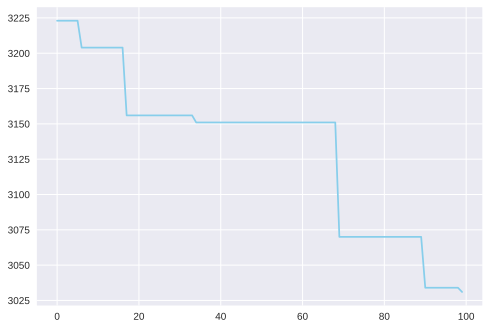

[21, 19, 3, 9, 12, 7, 11, 0, 23, 20, 14, 13, 18, 15, 6, 16, 2, 4, 5, 1, 10, 24, 22, 17, 8]


In [42]:
best, history = genetic_algorithm(
    cities,
    adjacency_mat,
    n_iter=100,
    verbose=False,
    print_interval= 30,
    return_history=True,
)

plt.plot(range(len(history)), history, color="skyblue")
plt.show()
print(best)